# KMeans Clustering

# Reading Dataset

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
A = pd.read_csv("C:/Users/Shruti/Downloads/Cars93.csv")

# Preprocessing

In [2]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
Q = pd.DataFrame(mm.fit_transform(A[["Price","MPG.city"]]),columns=["Price","MPG.city"])

# Selecting the best K value - Elbow Curve(X(K),Y(WCSS|Inertia))

In [4]:
from sklearn.cluster import KMeans
WCSS = []
K = range(2,20,1)
for i in K:
    km = KMeans(n_clusters=i)
    model = km.fit(Q)
    WCSS.append(model.inertia_)

([<matplotlib.axis.XTick at 0x1f207a29040>,
 <a list of 18 Text major ticklabel objects>)

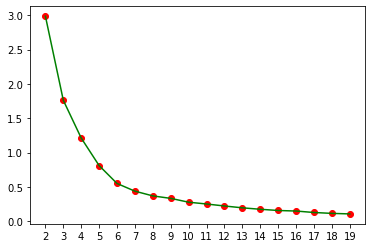

In [5]:
import matplotlib.pyplot as plt
plt.scatter(K,WCSS,c="red")
plt.plot(K,WCSS,c="green")
plt.xticks(range(2,20,1))

# Clustering

In [6]:
km = KMeans(n_clusters=5)
model = km.fit(Q)
model.labels_

array([4, 2, 0, 2, 0, 4, 0, 0, 0, 2, 2, 4, 4, 0, 4, 0, 0, 0, 2, 0, 4, 0,
       1, 4, 4, 0, 4, 0, 1, 0, 1, 4, 4, 4, 4, 0, 0, 0, 3, 1, 4, 3, 4, 1,
       4, 4, 4, 2, 0, 2, 2, 2, 1, 1, 4, 0, 2, 2, 2, 4, 0, 1, 0, 1, 4, 0,
       0, 4, 4, 0, 0, 4, 1, 4, 0, 0, 0, 0, 1, 1, 4, 4, 3, 1, 4, 4, 0, 4,
       0, 0, 0, 0, 0])

In [7]:
W = A[["Price","MPG.city"]]
W['Cluster'] = model.labels_
W['Model'] = A.Make

In [8]:
W.head()

,Price,MPG.city,Cluster,Model
0,15.9,25,4,Acura Integra
1,33.9,18,2,Acura Legend
2,29.1,20,0,Audi 90
3,37.7,19,2,Audi 100
4,30.0,22,0,BMW 535i


In [9]:
car = input("select your car, and we wil give you recommendations for similar cars: ")
cluster_no = W[W["Model"]==car].Cluster.values[0]
list(W[W["Cluster"]==cluster_no].Model)

select your car, and we wil give you recommendations for similar cars: Audi 90


['Audi 90',
 'BMW 535i',
 'Buick LeSabre',
 'Buick Roadmaster',
 'Buick Riviera',
 'Chevrolet Camaro',
 'Chevrolet Lumina_APV',
 'Chevrolet Astro',
 'Chevrolet Caprice',
 'Chrylser Concorde',
 'Chrysler Imperial',
 'Dodge Caravan',
 'Dodge Stealth',
 'Eagle Vision',
 'Ford Aerostar',
 'Ford Taurus',
 'Ford Crown_Victoria',
 'Lexus ES300',
 'Mazda MPV',
 'Mercury Cougar',
 'Mitsubishi Diamante',
 'Nissan Quest',
 'Nissan Maxima',
 'Oldsmobile Silhouette',
 'Oldsmobile Eighty-Eight',
 'Pontiac Firebird',
 'Pontiac Grand_Prix',
 'Pontiac Bonneville',
 'Saab 900',
 'Toyota Previa',
 'Volkswagen Eurovan',
 'Volkswagen Passat',
 'Volkswagen Corrado',
 'Volvo 240',
 'Volvo 850']